# Libraries

In [1]:
import astropy.io.fits   as pf  # previously pyfits
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import scipy.interpolate as s

# File & spectrum

In [2]:
spec       = './t05750_g+4.5_p00p00_hrplc.fits'
ftfile     = pf.open(spec)
flux       = pf.getdata(spec)
wl_i       = ftfile[0].header['CRVAL1']
wl_step    = ftfile[0].header['CDELT1']
wavelength = np.arange(flux.size)*wl_step+wl_i      # wavelength

# Rebinning

### Set the rebinning parameters here:

In [3]:
# what is your range of wavelength? I'm putting this automatically (maximum and minimum values), 
# but this can be changed.
wl_max = wavelength.max()
wl_min = wavelength.min()
print(wl_min, wl_max)             # Checking if the range of wavelength is correct

(2500.0, 9000.0)


In [4]:
# let's do the same thing for the flux:
flx_max = flux.max()
flx_min = flux.min()
print(flx_min, flx_max)

(1345.7502, 3368227.2)


In [5]:
# step: what is your resolution needs? 1A? 0.1A? 0.001A? etc. I am adding 0.05 as an example.
my_step = 0.05

### This is a simple interpolation (1d)
for other options, please check: https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [6]:
interpolation_function = s.interp1d(wavelength, flux)

### Wavelength rebin (will be used to set the new flux with the function stablished above)

In [7]:
new_wavelength = np.arange(start=wl_min,  stop=wl_max, step=my_step)

### Now flux rebin

In [8]:
new_flux = np.arange(start=flx_min, stop=flx_max)
new_flux = interpolation_function(new_wavelength)

# Saving in a csv file
for other formats please see: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [9]:
data = np.column_stack((new_wavelength, new_flux))
data = pd.DataFrame(data)
header = ['wavelength', 'flux']
data.columns = header
data.to_csv('./my_spec.csv', index=False)

# Let's see if our data is well rebinned:

In [10]:
data

,wavelength,flux
0,2500.00,1.059661e+05
1,2500.05,9.930159e+04
2,2500.10,9.132338e+04
3,2500.15,8.485394e+04
4,2500.20,8.380351e+04
5,2500.25,8.858596e+04
6,2500.30,8.885805e+04
7,2500.35,8.237402e+04
8,2500.40,6.904988e+04
9,2500.45,5.886147e+04


# Checking the spectrum

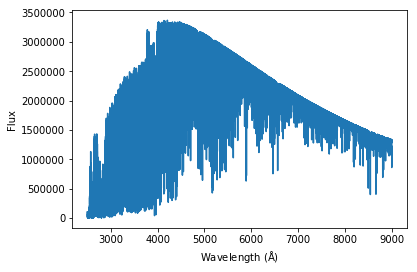

In [11]:
plt.plot(new_wavelength, new_flux, '-')
plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
plt.ylabel(r"Flux")
plt.show()